In [1]:
import numpy as np
from netCDF4 import Dataset
import xarray as xr
import dask as ds
from cdo import *
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import from_levels_and_colors
from pylab import *
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

%matplotlib inline

#!jupyter nbextension enable code_prettify/autopep8

In [2]:
# using cdo python bindings to create ensemble means of different model realizations

cdo   = Cdo() 

ifile_aer = ['/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1i1p1f1_gr_201401-204312.nc',
             '/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r2i1p1f1_gr_201401-204312.nc',
             '/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r3i1p1f1_gr_201401-204312.nc',
             '/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r4i1p1f1_gr_201401-204312.nc'
             ]

outfile_aer = '/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1234i1p1f1_gr_201401-204312.nc'            
             
#cdo.ensmean(input=ifile_aer, output=outfile_aer)      

#print(cdo.ensmean(input=ifile_aer,returnCdf=True).variables)  

In [3]:
help(cdo.remap)

Help on method get in module cdo:

get(*args, **kwargs) method of cdo.Cdo instance
    NAME
        remap - Grid remapping
    
    SYNOPSIS
        remap,grid,weights  infile outfile
    
    DESCRIPTION
        Interpolation between different horizontal grids can be a very time-consuming 
        process. Especially if the data are on an unstructured and/or a large grid. 
        In this case the interpolation process can be split into two parts.
        Firstly the generation of the interpolation weights, which is the most time-consuming part.
        These interpolation weights can be reused for every remapping process with the operator remap.
        This operator remaps all input fields to a new horizontal grid. The remap type and 
        the interpolation weights of one input grid are read from a NetCDF file. More weights 
        are computed if the input fields are on different grids. The NetCDF file with the 
        weights should follow the SCRIP convention. Normally these

In [4]:
MPI_aer = ("/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_MPI-ESM1-2-LR_piClim-spAer-aer_r123i1p1f1_gn_184901-187912.nc",
           "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsut/rsut_Amon_MPI-ESM1-2-LR_piClim-spAer-aer_r123i1p1f1_gn_184901-187912.nc",
           "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rlut/rlut_Amon_MPI-ESM1-2-LR_piClim-spAer-aer_r123i1p1f1_gn_184901-187912.nc",
           "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsutcs/rsutcs_Amon_MPI-ESM1-2-LR_piClim-spAer-aer_r123i1p1f1_gn_184901-187912.nc",
           "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rlutcs/rlutcs_Amon_MPI-ESM1-2-LR_piClim-spAer-aer_r123i1p1f1_gn_184901-187912.nc",
           "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/clt/clt_Amon_MPI-ESM1-2-LR_piClim-spAer-aer_r123i1p1f1_gn_184901-187912.nc")

MPI_control = ("/data/aero/CMIP6/RFMIP/piClim-control/rsdt/rsdt_Amon_MPI-ESM1-2-LR_piClim-control_r123i1p1f1_gn_184901-187912.nc",
               "/data/aero/CMIP6/RFMIP/piClim-control/rsut/rsut_Amon_MPI-ESM1-2-LR_piClim-control_r123i1p1f1_gn_184901-187912.nc",
               "/data/aero/CMIP6/RFMIP/piClim-control/rlut/rlut_Amon_MPI-ESM1-2-LR_piClim-control_r123i1p1f1_gn_184901-187912.nc",
               "/data/aero/CMIP6/RFMIP/piClim-control/rsutcs/rsutcs_Amon_MPI-ESM1-2-LR_piClim-control_r123i1p1f1_gn_184901-187912.nc",
               "/data/aero/CMIP6/RFMIP/piClim-control/rlutcs/rlutcs_Amon_MPI-ESM1-2-LR_piClim-control_r123i1p1f1_gn_184901-187912.nc",
               "/data/aero/CMIP6/RFMIP/piClim-control/clt/clt_Amon_MPI-ESM1-2-LR_piClim-control_r123i1p1f1_gn_184901-187912.nc"
                )
NorESM_aer = ("/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_NorESM2-LM_piClim-spAer-aer_r1i1p1f1_gn_000101-003012.nc",
              "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsut/rsut_Amon_NorESM2-LM_piClim-spAer-aer_r1i1p1f1_gn_000101-003012.nc",
              "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rlut/rlut_Amon_NorESM2-LM_piClim-spAer-aer_r1i1p1f1_gn_000101-003012.nc",
              "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsutcs/rsutcs_Amon_NorESM2-LM_piClim-spAer-aer_r1i1p1f1_gn_000101-003012.nc",
              "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rlutcs/rlutcs_Amon_NorESM2-LM_piClim-spAer-aer_r1i1p1f1_gn_000101-003012.nc",
              "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/clt/clt_Amon_NorESM2-LM_piClim-spAer-aer_r1i1p1f1_gn_000101-003012.nc"
             )

NorESM_control = ("/data/aero/CMIP6/RFMIP/piClim-control/rsdt/rsdt_Amon_NorESM2-LM_piClim-control_r1i1p1f1_gn_000101-003012.nc",
                  "/data/aero/CMIP6/RFMIP/piClim-control/rsut/rsut_Amon_NorESM2-LM_piClim-control_r1i1p1f1_gn_000101-003012.nc",
                  "/data/aero/CMIP6/RFMIP/piClim-control/rlut/rlut_Amon_NorESM2-LM_piClim-control_r1i1p1f1_gn_000101-003012.nc",
                  "/data/aero/CMIP6/RFMIP/piClim-control/rsutcs/rsutcs_Amon_NorESM2-LM_piClim-control_r1i1p1f1_gn_000101-003012.nc",
                  "/data/aero/CMIP6/RFMIP/piClim-control/rlutcs/rlutcs_Amon_NorESM2-LM_piClim-control_r1i1p1f1_gn_000101-003012.nc",
                  "/data/aero/CMIP6/RFMIP/piClim-control/clt/clt_Amon_NorESM2-LM_piClim-control_r1i1p1f1_gn_000101-003012.nc"
                 )
IPSL_aer = ("/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1234i1p1f1_gr_201401-204312.nc",
            "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsut/rsut_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1234i1p1f1_gr_201401-204312.nc",
            "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rlut/rlut_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1234i1p1f1_gr_201401-204312.nc",
            "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsutcs/rsutcs_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1234i1p1f1_gr_201401-204312.nc",
            "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rlutcs/rlutcs_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1234i1p1f1_gr_201401-204312.nc",
            "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/clt/clt_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1234i1p1f1_gr_201401-204312.nc"
           )

IPSL_control = ("/data/aero/CMIP6/RFMIP/piClim-control/rsdt/rsdt_Amon_IPSL-CM6A-LR_piClim-control_r1234i1p1f1_gr_201401-204312.nc",
                "/data/aero/CMIP6/RFMIP/piClim-control/rsut/rsut_Amon_IPSL-CM6A-LR_piClim-control_r1234i1p1f1_gr_201401-204312.nc",
                "/data/aero/CMIP6/RFMIP/piClim-control/rlut/rlut_Amon_IPSL-CM6A-LR_piClim-control_r1234i1p1f1_gr_201401-204312.nc",
                "/data/aero/CMIP6/RFMIP/piClim-control/rsutcs/rsutcs_Amon_IPSL-CM6A-LR_piClim-control_r1234i1p1f1_gr_201401-204312.nc",
                "/data/aero/CMIP6/RFMIP/piClim-control/rlutcs/rlutcs_Amon_IPSL-CM6A-LR_piClim-control_r1234i1p1f1_gr_201401-204312.nc",
                "/data/aero/CMIP6/RFMIP/piClim-control/clt/clt_Amon_IPSL-CM6A-LR_piClim-control_r1234i1p1f1_gr_201401-204312.nc"
               )

In [5]:
# Read all files and merge them

MPI_data_aer = xr.open_mfdataset(MPI_aer, parallel=True)
MPI_data_control = xr.open_mfdataset(MPI_control, parallel=True)

NorESM_data_aer = xr.open_mfdataset(NorESM_aer, parallel=True)
NorESM_data_control = xr.open_mfdataset(NorESM_control, parallel=True)

IPSL_data_aer = xr.open_mfdataset(IPSL_aer, parallel=True)
IPSL_data_control = xr.open_mfdataset(IPSL_control, parallel=True)

In [6]:
NorESM_data_aer

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 144, time: 360)
Coordinates:
  * time       (time) object 0001-01-16 12:00:00 ... 0030-12-16 12:00:00
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(96, 2), meta=np.ndarray>
    clt        (time, lat, lon) float32 dask.array<chunksize=(360, 96, 144), meta=np.ndarray>
    rlut       (time, lat, lon) float32 dask.array<chunksize=(360, 96, 144), meta=np.ndarray>
    rlutcs     (time, lat, lon) float32 dask.array<chunksize=(360, 96, 144), meta=np.ndarray>
    rsdt       (time, lat, lon) float32 dask.array<chunksize=(360, 96, 144), meta=np.ndarray>
    rsut       (time, lat, lon) float32 dask.array<chunksize=(360, 96, 144), meta=np.ndarray>
    rsutcs     (time, lat, lon) float32 dask.array<chunksize=(360, 96, 144), meta=np.ndarray>
Attributes:
    CDI:                       Climate Data Interface version 1.9.9rc1 (https...
    history:                   Thu Sep 24 11:44:35 2020: cdo mergetime rsdt_A...
    source:                    NorESM2-LM (2017): \naerosol: OsloAero\natmos:...
    institution:               NorESM Climate modeling Consortium consisting ...
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               RFMIP
    branch_method:             Hybrid-restart from year 1751-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     485450.0
    contact:                   Please send any requests or bug reports to nor...
    creation_date:             2019-09-30T19:30:08Z
    data_specs_version:        01.00.31
    experiment:                effective radiative forcing at present day wit...
    experiment_id:             piClim-spAer-aer
    external_variables:        areacella
    forcing_index:             1
    frequency:                 mon
    further_info_url:          https://furtherinfo.es-doc.org/CMIP6.NCC.NorES...
    grid:                      finite-volume grid with 1.9x2.5 degree lat/lon...
    grid_label:                gn
    initialization_index:      1
    institution_id:            NCC
    mip_era:                   CMIP6
    model_id:                  NorESM2-LM
    nominal_resolution:        250 km
    parent_activity_id:        CMIP
    parent_experiment_id:      piControl
    parent_mip_era:            CMIP6
    parent_source_id:          NorESM2-LM
    parent_sub_experiment_id:  none
    parent_time_units:         days since 0421-01-01
    parent_variant_label:      r1i1p1f1
    physics_index:             1
    product:                   model-output
    realization_index:         1
    realm:                     atmos
    run_variant:               N/A
    source_id:                 NorESM2-LM
    source_type:               AGCM
    sub_experiment:            none
    sub_experiment_id:         none
    table_id:                  Amon
    table_info:                Creation Date:(24 July 2019) MD5:0bb394a356ef9...
    title:                     NorESM2-LM output prepared for CMIP6
    variable_id:               rsdt
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/bae4c64b-0d79-4767-9a93-ee8e5e8cf597
    CDO:                       Climate Data Operators version 1.9.9rc1 (https...

In [7]:
def compute_forcings_allsky(data_aerosols, data_control):
    ''' Calculate the effective radiative forcing at TOA due shortwave and longwave radiation flux
       Parameters:
       -----------
       data_aerosols: xarray.Dataset
                 aerosol data; should include 'rsdt', 'rsut' and 'rlut' fluxes; usually: dim=(time, lat, lon) 
       data_control: xarray.Dataset
                     control data; should include 'rsdt', 'rsut' and 'rlut' fluxes and has to be of the 
                     same dimension as data_aer

       Returns:
       --------
       sw_forcing_toa: xarray.DataArray
                       shortwave forcing at toa; same dimension as input data (usually (time, lat, lon))
       lw_forcing_toa: xarray.DataArray
                       longwave forcing at toa; same dimension as input data (usually (time, lat, lon))
    '''

    sw_balance_aer = data_aerosols["rsdt"] - data_aerosols["rsut"]
    sw_balance_control = data_control["rsdt"] - data_control["rsut"]
    sw_forcing_toa = -sw_balance_control + sw_balance_aer
    lw_balance_aer = data_aerosols["rsdt"] - \
        data_aerosols["rsut"] - data_aerosols["rlut"]
    lw_balance_control = data_control["rsdt"] - \
        data_control["rsut"] - data_control["rlut"]
    lw_forcing_toa = -lw_balance_control + lw_balance_aer

    return sw_forcing_toa, lw_forcing_toa

In [8]:
def compute_forcings_clearsky(data_aerosols, data_control):
    ''' Calculate the effective radiative forcing at TOA due shortwave and longwave radiation flux
       Parameters:
       -----------
       data_aerosols: xarray.Dataset
                 aerosol data; should include 'rsdt', 'rsut' and 'rlut' fluxes; usually: dim=(time, lat, lon) 
       data_control: xarray.Dataset
                     control data; should include 'rsdt', 'rsut' and 'rlut' fluxes and has to be of the 
                     same dimension as data_aer

       Returns:
       --------
       sw_forcing_toa: xarray.DataArray
                       shortwave forcing at toa; same dimension as input data (usually (time, lat, lon))
       lw_forcing_toa: xarray.DataArray
                       longwave forcing at toa; same dimension as input data (usually (time, lat, lon))
    '''

    sw_balance_aer = data_aerosols["rsdt"] - data_aerosols["rsutcs"]
    sw_balance_control = data_control["rsdt"] - data_control["rsutcs"]
    sw_forcing_toa = -sw_balance_control + sw_balance_aer
    lw_balance_aer = data_aerosols["rsdt"] - \
        data_aerosols["rsutcs"] - data_aerosols["rlutcs"]
    lw_balance_control = data_control["rsdt"] - \
        data_control["rsutcs"] - data_control["rlutcs"]
    lw_forcing_toa = -lw_balance_control + lw_balance_aer

    return sw_forcing_toa, lw_forcing_toa

In [9]:
def compute_cloudy_sky(data_aerosols, data_control):
    ''' Calculate the effective radiative forcing at TOA due shortwave and longwave radiation flux
       Parameters:
       -----------
       data_aerosols: xarray.Dataset
                 aerosol data; should include 'rsdt', 'rsut' and 'rlut' fluxes; usually: dim=(time, lat, lon) 
       data_control: xarray.Dataset
                     control data; should include 'rsdt', 'rsut' and 'rlut' fluxes and has to be of the 
                     same dimension as data_aer

       Returns:
       --------
       sw_forcing_toa: xarray.DataArray
                       shortwave forcing at toa; same dimension as input data (usually (time, lat, lon))
       lw_forcing_toa: xarray.DataArray
                       longwave forcing at toa; same dimension as input data (usually (time, lat, lon))
    '''

    forcing_allsky = compute_forcings_allsky(data_aerosols, data_control)
    forcing_clearsky = compute_forcings_clearsky(data_aerosols, data_control)

    a = forcing_allsky[0] - (1 - data_aerosols["clt"]
                             * 0.01) * forcing_clearsky[0]
    a1 = forcing_allsky[0] - (1 - data_control["clt"]
                              * 0.01) * forcing_clearsky[0]
    a2 = forcing_allsky[1] - (1 - data_aerosols["clt"]
                              * 0.01) * forcing_clearsky[1]
    a3 = forcing_allsky[1] - (1 - data_control["clt"]
                              * 0.01) * forcing_clearsky[1]

    deno1 = data_aerosols["clt"].values * 0.01
    deno2 = data_control["clt"].values * 0.01

    deno1[deno1 < 0.01] = 0  # xarray equivalent: deno1.where(deno1 < 0.01, 0)
    deno2[deno2 < 0.01] = 0  # xarray equivalent: deno2.where(deno2 < 0.01, 0)

    # haven't found an xarray equivalent of np.divide
    sw_cloudy_aer = np.divide(
        a.values, deno1, out=np.zeros_like(a.values), where=(deno1 != 0))
    sw_cloudy_control = np.divide(
        a1.values, deno2, out=np.zeros_like(a1.values), where=(deno2 != 0))
    lw_cloudy_aer = np.divide(
        a2.values, deno1, out=np.zeros_like(a2.values), where=(deno1 != 0))
    lw_cloudy_control = np.divide(
        a3.values, deno2, out=np.zeros_like(a3.values), where=(deno2 != 0))

    return sw_cloudy_control, sw_cloudy_aer, lw_cloudy_control, lw_cloudy_aer

In [10]:
def global_mean(data, data_main=None):
    ''' Calculate the global mean value of given data with (lat,lon) coordinates
        Parameters:
        -----------

        data: 3D or 2D xarray.DataArray/ numpy.ndarray
              can be forcing, SST, temperature, preciptitation, etc. over a sphere. 
              For 2D ndarray, axis has to be changed to 0
        data_main:  3D or 2D xarray.DataArray
               required to convert latitudes

        Returns:
        --------
        area_mean: 1D xarray.DataArray/ numpy.ndarray
                   area mean. Use only 2 decimal points
        global_mean: float64
                     spatial and/or temporal mean.  Use only 2 decimal points
    '''
    if data_main is not None:
        weight = np.cos(np.deg2rad(data_main.lat))
        area_mean = np.average(data, axis=1, weights=weight)
        global_mean = area_mean.mean()
    else:
        weight = np.cos(np.deg2rad(data.lat))
        area_mean = data.weighted(weight).mean(dim=("lon", "lat"))
        global_mean = area_mean.mean().values

    return (area_mean, global_mean)

In [115]:
def t_test(data, n, pop_mean):
    sample_mean = data.mean(dim='time') #aka temporal mean; at each grid cell and not field
    sample_var = data.var(dim='time', ddof=1)
    t_statistics = (sample_mean - pop_mean) / (np.sqrt(sample_var/n))
    p_value = stats.t.sf(np.abs(t_statistics), n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
    return t_statistics, p_value

In [105]:
def t_test_nd(data, n, pop_mean):
    # aka temporal mean; at each grid cell and not field
    sample_mean = np.mean(data, axis=0)
    sample_var = np.var(data, axis=0, ddof=1)
    t_statistics = (sample_mean - pop_mean) / (np.sqrt(sample_var/n))
    p_value = stats.t.sf(np.abs(t_statistics), n-1) * \
        2  # two-sided pvalue = Prob(abs(t)>tt)
    return t_statistics, p_value

In [12]:
def time_series(data, variable, grid_dist=1.0, plot=True):
    ''' Compute the time-series for any given variable of interest with (lat,lon) coordinates
        Taken from: https://github.com/pangeo-data/pangeo-tutorial/blob/agu2019/notebooks/xarray.ipynb#More-Complicated-Example:-Weighted-Mean
    Parameters:
    -----------
    data:      xarray.Dataset
               usually: dim=(time, lat, lon) and contains several variables of interest such as temperature etc.

    variable: 3D or 2D xarray.DataArray
               can be forcing, SST, temperature, preciptitation, etc. over a sphere

    grid_dist: float64
               distance between the grid points. Default = 1.0

    Returns:
    --------
    weighted_mean: 1D xarray.DataArray
                   returns the weighted time series data of the variable of interest 
                   by calculating the total spherical area and points on the map where the variable is not zero.
                   where ϕ is latitude, dϕ is the spacing of the points in latitude, 
                   dλ is the spacing of the points in longitude, and R is Earth's radius. 

    plot:      boolean
               plots time series data if True. Default = True
    '''

    R = 6.37e6
    dϕ = np.deg2rad(grid_dist)
    dλ = np.deg2rad(grid_dist)
    dA = R**2 * dϕ * dλ * np.cos(np.deg2rad(data.lat))

    pixel_area = dA.where(variable[0].notnull())
    total_area = pixel_area.sum(dim=('lon', 'lat'))
    weighted_mean = (
        variable * pixel_area).sum(dim=('lon', 'lat')) / total_area

    if plot is True:
        weighted_mean.plot()

    return weighted_mean

In [13]:
def plot_data(dataset, data_var, dtype="ndarray", ticks=None, colors=None, levels=None, title=None, figname=None):

    if dtype == "ndarray":
        vmax = np.max(np.mean(data_var, axis=0))
        vmin = np.min(np.mean(data_var, axis=0))
        var = data_var
    else:
        vmax = np.max(np.mean(data_var, axis=0))
        # (data_var.mean("year").values)
        vmin = np.min(np.mean(data_var, axis=0))
        var = data_var.values

    v_ext = np.max([np.abs(vmin), np.abs(vmax)])
    norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax=v_ext, vcenter=0)
    cmap = cm.get_cmap('RdBu_r', 20)

    fig = plt.figure(figsize=(9, 7))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())
    ax.set_global()
    ax.coastlines()
    val, ll = add_cyclic_point(var, coord=dataset.lon.values)

    if colors is not None:
        cs = ax.contourf(ll, dataset.lat.values, np.mean(val, axis=0), norm=norm,
                         transform=ccrs.PlateCarree(), colors=colors, levels=levels, extend='both')
        plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04,
                     label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal', ticks=ticks)  # , hatches=["", "//"]
        cs.cmap.set_under("#053061")
        cs.cmap.set_over("#67001f")

    else:
        cs = ax.contourf(ll, dataset.lat.values, np.mean(
            val, axis=0), norm=norm, transform=ccrs.PlateCarree(), cmap='RdBu_r')
        plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=True,
                     label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal')

    if title is not None:
        plt.title(title, loc='center', fontsize=12)

    if figname is not None:
        plt.savefig(figname + ".pdf", bbox_inches='tight', transparent=True)

    return cs

In [14]:
def plot_annual_data(dataset, data_var, dtype="ndarray", ax=None, ticks=None, colors=None, levels=None, title=None, figname=None):

    if dtype == "ndarray":
        vmax = np.max(data_var)
        vmin = np.min(data_var)
        var = data_var
    else:
        vmax = np.max(data_var.values)
        vmin = np.min(data_var.values)
        var = data_var.values

    v_ext = np.max([np.abs(vmin), np.abs(vmax)])
    norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax=v_ext, vcenter=0)
    cmap = cm.get_cmap('RdBu_r', 20)

    ax.set_global()
    ax.coastlines()
    val, ll = add_cyclic_point(var, coord=data_var.lon.values)

    if colors is not None:
        cs = ax.contourf(ll, data_var.lat.values, val, norm=norm, transform=ccrs.PlateCarree(
        ), colors=colors, levels=levels, extend='both')
        cs.cmap.set_under("#053061")
        cs.cmap.set_over("#67001f")
    else:
        cs = ax.contourf(ll, data_var.lat.values, val, norm=norm,
                         transform=ccrs.PlateCarree(), cmap='RdBu_r')

    if title is not None:
        plt.title(title, loc='center', fontsize=12)

    if figname is not None:
        plt.savefig(figname + ".pdf", bbox_inches='tight', transparent=True)

    return cs

In [89]:
# Compute the cloudy sky 
forcing_Nor_cloud = compute_cloudy_sky(data_aerosols=NorESM_data_aer, data_control=NorESM_data_control)
forcing_MPI_cloud = compute_cloudy_sky(data_aerosols=MPI_data_aer, data_control=MPI_data_control)
forcing_IPSL_cloud = compute_cloudy_sky(data_aerosols=IPSL_data_aer, data_control=IPSL_data_control)

In [17]:
forcing_Nor_all = compute_forcings_allsky(data_aerosols=NorESM_data_aer, data_control=NorESM_data_control)
forcing_MPI_all = compute_forcings_allsky(data_aerosols=MPI_data_aer, data_control=MPI_data_control)
forcing_IPSL_all = compute_forcings_allsky(data_aerosols=IPSL_data_aer, data_control=IPSL_data_control)

In [18]:
forcing_Nor_clear = compute_forcings_clearsky(data_aerosols=NorESM_data_aer, data_control=NorESM_data_control)
forcing_MPI_clear = compute_forcings_clearsky(data_aerosols=MPI_data_aer, data_control=MPI_data_control)
forcing_IPSL_clear = compute_forcings_clearsky(data_aerosols=IPSL_data_aer, data_control=IPSL_data_control)

In [78]:
ticks = [-16,-12,-8,-4,0,4,8,12,16] 
colors = ["#053061","#1e61a5","#3d8bbf","#7cb7d7","#bad9e9","white","#fac7ae","#ec9274","#cf5347","#ab162a","#67001f"]
levels = [-16,-12,-8,-4,-.5,.5,4,8,12,16]

In [116]:
#ttest, pval = t_test_nd(forcing_MPI_cloud[1], n= 30, pop_mean=0)
ttest1, pval1 = t_test(forcing_IPSL_all[1], n= 30, pop_mean=0)
#ttest2, pval2 = t_test_nd(forcing_Nor_cloud[1], n= 30, pop_mean=0)

In [123]:
pval1.shape, ttest1.shape

((143, 144), (143, 144))

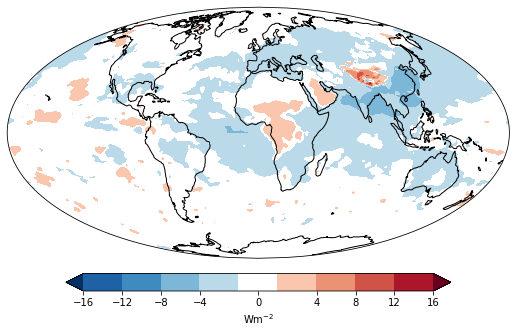

In [118]:
# compare p value > alpha for insginificant forcing values

data = IPSL_data_aer
forcing = forcing_IPSL_all[1]
p = pval1
name = "hatched_all_lw_IPSL.pdf"

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.coastlines()
ax.set_global()

var, ll = add_cyclic_point(p, coord=data.lon)
var1, ll = add_cyclic_point(np.mean(forcing, axis=0), coord=data.lon) #forcing.mean(dim='time')

cmap, norm = from_levels_and_colors(levels, colors, extend='both')

#im = ax.pcolormesh(ll, data['lat'], var1, transform=ccrs.PlateCarree(), cmap=cmap,norm=norm)
im = ax.contourf(ll, data.lat.values, var1, transform=ccrs.PlateCarree(), colors=colors,levels=levels, norm=norm, extend='both')

#ax.contourf(ll, data['lat'], var, transform=ccrs.PlateCarree(), levels= [0,0.05,1], hatches = [' .', ' '], alpha=0)

plt.colorbar(im, shrink=0.8, fraction=0.046, pad=0.04, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal', ticks=ticks)
plt.savefig(name, transparent=True, bbox_inches='tight')

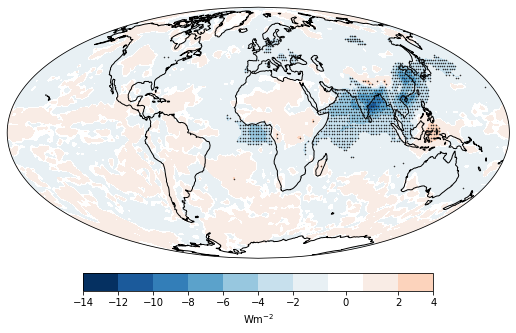

In [17]:
# compare p value > alpha for insginificant forcing values

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
var, ll = add_cyclic_point(forcing_MPI_all[0].mean(dim='time'), coord=MPI_data_aer.lon)

cs = ax.contourf(ll, MPI_data_aer.lat, var, transform=ccrs.PlateCarree(), colors=colors,levels=levels)

#Hatching 

LONs, lats = np.meshgrid(MPI_data_aer['lon'], MPI_data_aer['lat'])
# find significant points
sig = pval.flatten() <= 0.05
LONs = LONs.flatten()[sig == 1]
lats = lats.flatten()[sig == 1]
# add scatterpoints
ax.plot(LONs, lats, '.', color='0.1', transform=ccrs.PlateCarree(), ms=1)

plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal', ticks=ticks)

In [ ]:
# Computing the annual mean of the all sky data

In [ ]:
ds = forcing_Nor_all[0]
ds_new = ds.groupby('time.year').mean(dim='time')
ds_new

In [ ]:
#def annual_mean

In [ ]:
ds = forcing_Nor_all[0]
ds_new = ds.groupby('time.year').mean(dim='time')

ds1 = forcing_MPI_all[0]
ds1_new = ds1.groupby('time.year').mean(dim='time')

ds2 = forcing_IPSL_all[0]
ds2_new = ds2.groupby('time.year').mean(dim='time')

In [ ]:
time_avg = time_series(NorESM_data_aer,ds_new, grid_dist = 1.0, plot=True)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,7), subplot_kw=dict(projection=ccrs.Mollweide()))
im = plot_annual_data(NorESM_data_aer, ds_new[14], dtype= 'xarray', ax=axes)
plt.colorbar(im, ax=axes, shrink=0.5)
plt.show()

In [ ]:
ticks1 = [-20,-16,-12,-8,-4,0,4,8,12,16,20] 
colors = ["#1e61a5","#3d8bbf","#7cb7d7","#bad9e9","#e6eff4","white","#faeae1","#fac7ae","#ec9274","#cf5347","#ab162a"]
levels1 = [-20,-16,-12,-8,-4,-.1,.1,4,8,12,16,20]

In [ ]:
data = [ds_new, ds1_new, ds2_new]
data_main = [NorESM_data_aer, MPI_data_aer, IPSL_data_aer]
labels = ["NorESM2", "MPI-ESM 1.2", "IPSL-CM6A"]
fig, axes = plt.subplots(ncols=3, figsize=(30,25), subplot_kw=dict(projection=ccrs.Mollweide()))

#for i in range(27,30): #ds_new.shape[0]
for data, data_main,labels, ax in zip(data,data_main,labels,axes):
    im = plot_annual_data(data_main ,data[14] ,dtype="xarray", ax=ax, ticks=ticks1, colors=colors, levels=levels1)
    ax.set_title(labels, fontsize=22)

cbar = fig.colorbar(im, ax=axes.ravel().tolist(), ticks=ticks1, orientation='horizontal',fraction=0.03,shrink = 0.75)
cbar.set_label(label=r"$\mathrm{Wm}^{-2}$", size=20)
cbar.ax.tick_params(labelsize=18) 
fig.subplots_adjust(wspace=0.02, bottom=0.17)
fig.suptitle('Radiative Forcing at TOA', x= 0.50, y= 0.37, fontsize=25)
#plt.savefig("subplot_" +str(15)+".png", dpi=300, transparent=True, bbox_inches='tight')
plt.show() 

In [20]:
from pylab import *

cmap = cm.get_cmap('RdBu_r', 10)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    print(matplotlib.colors.rgb2hex(rgb))

#053061
#256baf
#559ec9
#a7d0e4
#e2edf3
#fae7dc
#f7b799
#dd6f59
#b6202f
#67001f
